#                                        Why are Students Absent?

# Project One

### Introduction

New York City Public Schools are the largest public school system in the United States. As such, large datasets on many relevant topics are compiled every year in order to facilitate the best possible education for all New York City public school students. The data being used in this project is from 1270 New York City public schools that serve students from Kindergarten to grade 12 in 2016. The dataset contains information on schools, their location, the background of their students, how they perform on New York State standardized tests, and more. All data is based on averages among each school, and is publicly available. It is compiled by PASSNYC, a non-profit dedicated to broadening educational opportunities for New York City students.

In this project the data is being used to answer the question "Why are students absent?". This is a pertinent question for today's schools. Only recently, in 2016, did the US Department of Education release data for chronic absenteeism. It has not been tracked in aggregate so there is little research available to understand chronic absenteeism. Much of the current research on the topic is about its effects on students. This paper instead aims to explore the connections among potential contributors to chronic absenteeism and the phenomenon of chronic absenteeism itself.

Through summary statistical analysis and various visuals, various possible relationships have been found and are worth further exploration. The first is the possible positive relationship between economic need and chronic absenteeism. Schools with higher economic need have shown to have generally higher rates of chronic absenteeism possibly due to factors such as the need to take care of a dependent or a need to attend work instead of school. Additionally, it was revealed that certain boroughs of New York City show higher rates of chronic absenteeism. The relationships revealed through statistical analysis show the need for more data to be included on poverty rates and percentage of residents at public versus private schools. With regression analysis as well, these relationships can be further understood. 

### Variables

The X variables being used in this project are an economic need index, average ELA proficiency, average math proficiency, trust percentage, and strong family-community ties percentage. The economic need index is a number 0-1 with the lowest amount of economic need being 0 and highest being 1. It is calculated using a formula including the percentage of students in temporary housing, eligibility for HRA, a New York City social services program, and amount of reduced cost lunch provided to students with low income. Additionally, I am using the average ELA and Math proficiency for each school. This is measured through New York State standardized testing where anything above a score of 3 is a pass. Trust percentage is a survey-based statistic that reflects if relationships between students, families, and teachers are based on respect and trust. Similarly, strong family-community ties percentage is a rating that reflects how well the school forms partnerships with families and the community it serves. Percent of students chronically absent is the Y variable, and it measures the percent of students in every school that miss ten percent of school days or more in a given school year. 

These variables give the most complete picture of a student's background, integral for understanding chronic absenteeism. The economic need of a student could have an impact on whether or not the student comes to school as the student might have limited access to school supplies, reliable transportation, and time away from dependents. Additionally, average ELA and math test scores help to understand the academic background of the child. The trust a student and their family has in their teachers could be a factor in whether or not they come to school. A lack of trust could lead to a poor sense of belonging for the student, leading them not to attend school. Lastly, whether or not the school has strong ties with the community can affect a student's ability to come to school due to social services working well with the school and transportation availability. 

### Data Cleaning/Loading

In [98]:
#import all software needed
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
%matplotlib inline
from scipy import stats
from pandas.plotting import table
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

%matplotlib inline
# activate plot theme
#import qeds
#qeds.themes.mpl_style();

In [99]:
#read in data
df = pd.read_csv('2016 School Explorer.csv')

In [100]:
#define relevant columns
relevant_columns = ['Economic Need Index', 'Average ELA Proficiency', 'Average Math Proficiency', 'Trust %', 'Strong Family-Community Ties %', 'Percent of Students Chronically Absent']

In [101]:
#replace "N/A" to a null variable
df.replace('N/A', np.nan, inplace=True)

#delete rows with null variables in relevant columns
df.dropna(subset=relevant_columns, inplace=True)

In [102]:
columns_to_change = ['Trust %', 'Strong Family-Community Ties %', 'Percent of Students Chronically Absent']

#convert columns to float values
df[columns_to_change] = df[columns_to_change].apply(lambda x: x.str.rstrip('%').astype('float') / 100.0)

### Summary Statistics Tables

In [103]:
#create table with all relevant variables
relevant_columns_table = df[relevant_columns]

In [104]:
relevant_columns_table.describe()

#change this w/ HTML into a nice table

,Economic Need Index,Average ELA Proficiency,Average Math Proficiency,Trust %,Strong Family-Community Ties %,Percent of Students Chronically Absent
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000
mean,0.671048,2.534215,2.668956,0.903073,0.829589,0.216081
std,0.211201,0.363589,0.470470,0.061143,0.062508,0.140004
min,0.049000,1.810000,1.830000,0.000000,0.000000,0.000000
25%,0.550000,2.250000,2.300000,0.870000,0.800000,0.110000
50%,0.730000,2.450000,2.580000,0.910000,0.830000,0.200000
75%,0.840000,2.760000,2.980000,0.940000,0.870000,0.300000
max,0.957000,3.930000,4.200000,1.000000,0.990000,1.000000


The economic need index's mean is sixty seven percent, meaning that on average, over half of New York City public schools students rely on some type of government assistance. This is much higher than the national average and shows the school system in New York City serves many children from low income backgrounds. Additionally, over three fourths of students come from schools who score, on average, lower than proficient on state math and ELA exams. ELA is slightly lower, possibly reflecting the relatively large number of English language learners the school system educates. Both trust and family-community ties are strong at above eighty percent, on average. However, this could be the result of survey bias where only people involved in the school community respond, shifting the results. The percent of students chronically absent show very high rates. However, with the maximum being 1, it seems as though there are outliers affecting the dataset as having a chronic absence rate of one hundred percent could be a reflection of an error collecting or reporting the data.

In [105]:
#create table for chronic absence rate summary statistics for lower income schools

# Filter lower-income schools
lower_income_schools = relevant_columns_table[relevant_columns_table['Economic Need Index'] > relevant_columns_table['Economic Need Index'].mean()]

# Calculate summary statistics for chronic absence rate
chronic_absence_lower_income = lower_income_schools['Percent of Students Chronically Absent'].describe()

table_without_names = chronic_absence_lower_income.to_string(index=True)
title = "Summary Statistics for Chronic Absence in Lower-Income Schools"
print(f"{title}\n{table_without_names}")



Summary Statistics for Chronic Absence in Lower-Income Schools
count    734.000000
mean       0.271935
std        0.139042
min        0.000000
25%        0.180000
50%        0.270000
75%        0.350000
max        1.000000


This data suggests that students with greater economic need have a higher rate of chronic absenteeism. The mean indicates that on average, schools with economic need index higher than the average in New York City have an average chronic absenteeism percentage six percentage points higher than the City's schools as a whole. This could be caused by numerous factors including the need to work instead of attending school and a parent's need to work and leave an older child to care for a younger one. 

In [106]:
#create table for summary statistics for schools with below median math and ELA scores

# Filter schools with average scores of 2 or below on math and ELA exams
schools_under_proficiency = relevant_columns_table[relevant_columns_table['Average ELA Proficiency'] <= 2.58]

# Calculate summary statistics for chronic absence rate
chronic_absence_under_prof = schools_under_proficiency['Percent of Students Chronically Absent'].describe()

table = chronic_absence_under_prof.to_string(index=True)
title = "Summary Statistics for Chronic Absence in Lower-Income Schools"
print(f"{title}\n{table}")

Summary Statistics for Chronic Absence in Lower-Income Schools
count    749.000000
mean       0.268131
std        0.109411
min        0.000000
25%        0.190000
50%        0.260000
75%        0.350000
max        0.740000


The data shows chronic absenteeism is more common in schools with students who score, on average, lower than other New York City public schools. This could possibly be due to students not being in school enough to learn the neccessary material for the exams.

### Plots, Histograms, Figures

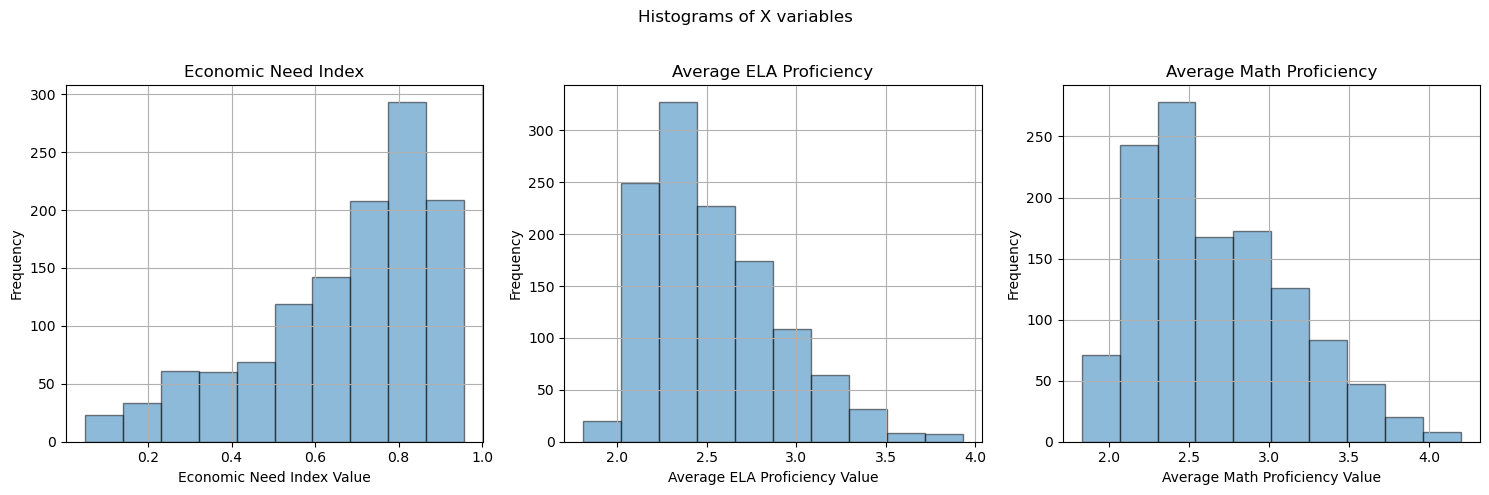

In [107]:
first_variables = df[['Economic Need Index', 'Average ELA Proficiency', 'Average Math Proficiency']]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Histograms of X variables')

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms
for i, (column, variable) in enumerate(first_variables.items()):
    variable.hist(bins=10, alpha=0.5, ax=axes[i], edgecolor= 'black')
    axes[i].set_title(column)
    axes[i].set_xlabel(f'{column} Value')  # Set unique x-axis label for each subplot
    axes[i].set_ylabel('Frequency')

# Adjust the layout to prevent title and label overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

The economic need index shows a left skewed distribution. This indicates that a high number of New York City public schools serve students with high amounts of economic need. This is possibly due to higher rates of poverty in New York City compared to the United States national average. Both test score histograms indicate that many schools tend to have non-proficient exam scores on average. 

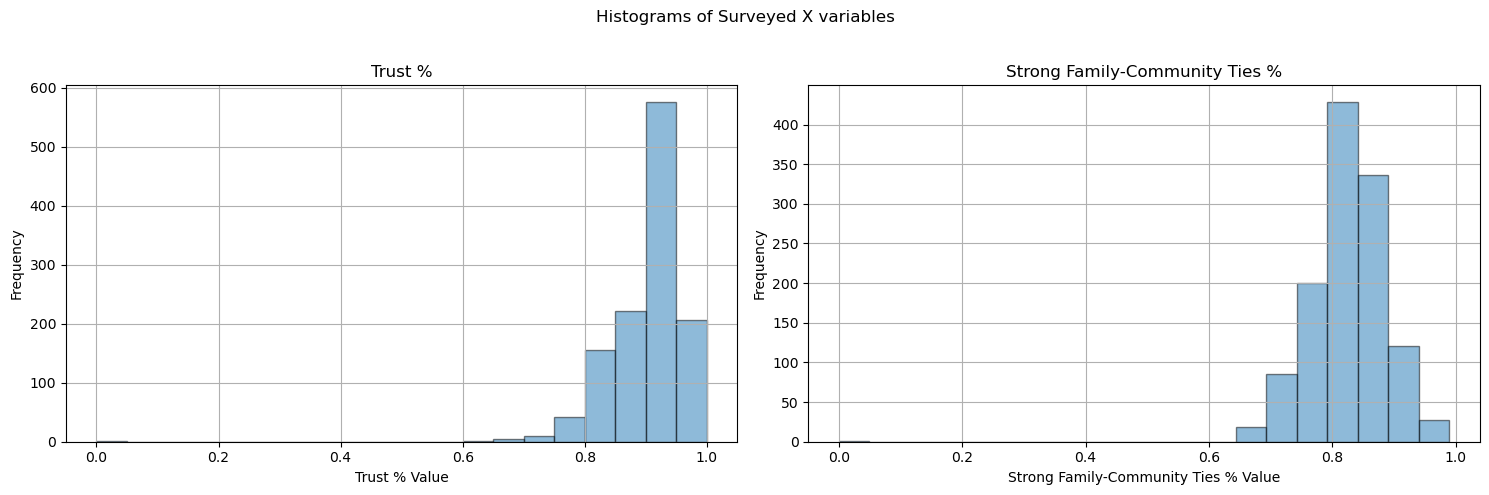

In [108]:
second_variables = df[['Trust %', 'Strong Family-Community Ties %']]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Histograms of Surveyed X variables')

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms
for i, (column, variable) in enumerate(second_variables.items()):
    variable.hist(bins=20, alpha=0.5, ax=axes[i], edgecolor= 'black')
    axes[i].set_title(column)
    axes[i].set_xlabel(f'{column} Value')  # Set unique x-axis label for each subplot
    axes[i].set_ylabel('Frequency')

# Adjust the layout to prevent title and label overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

Both graphs show a heavy left skew. This means that the data shows high trust and community ties in most New York City public schools on average. However, this could possibly be due to the fact that this data was compiled through a survey by the school system, meaning the only people who responded could be more involved with the school system than the average. 

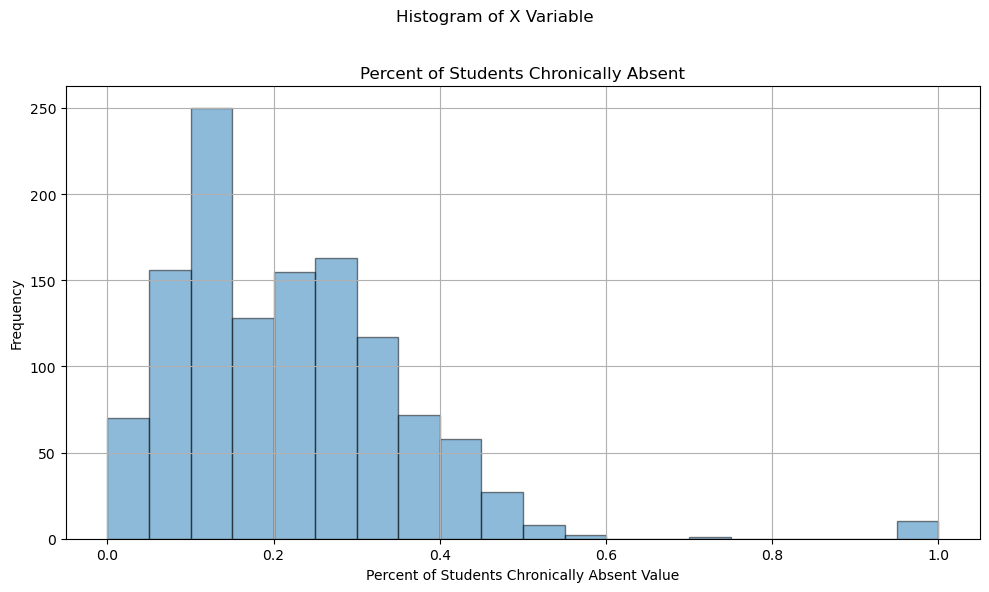

In [109]:
third_variable = df[['Percent of Students Chronically Absent']]

third_variable = df[['Percent of Students Chronically Absent']]

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Histogram of X Variable')

# Plot histogram
third_variable.hist(bins=20, alpha=0.5, ax=ax, edgecolor='black')
ax.set_title(third_variable.columns[0])
ax.set_xlabel(f'{third_variable.columns[0]} Value')  # Set x-axis label
ax.set_ylabel('Frequency')

# Adjust the layout to prevent title and label overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

The percent of students chronically absent shows a right skew, meaning that most schools have a mean greater than the median. This means that New York City public schools have a lower rate of chronic absenteeism than what is indicated by the mean. The schools who report a chronic absenteeism rate of close to 100% indicate that almost all students missed over ten percent of school days. This could either be due to extremely high rates of absences in the schools or false data. More analysis will be needed to determine the cause of these outlier schools' chronic absence rates. 

In [110]:
#create bar plot to show chronic absence rates for each NYC borough

def get_borough(zip_code):
    if 10001 <= zip_code <= 10282:
        return 'Manhattan'
    elif 10301 <= zip_code <= 10314:
        return 'Staten Island'
    elif 10451 <= zip_code <= 10475:
        return 'Bronx'
    elif (11004 <= zip_code <= 11109) or (11351 <= zip_code <= 11697):
        return 'Queens'
    elif 11201 <= zip_code <= 11256:
        return 'Brooklyn'
    else:
        return 'Unknown'

# get new borough column from the function
applicable_columns_table['Borough'] = applicable_columns_table['Zip'].apply(get_borough)

# Filter out 'Unknown' borough
applicable_columns_table = applicable_columns_table[applicable_columns_table['Borough'] != 'Unknown']

# group by borough and get average chronic absence rates
grouped_data = applicable_columns_table.groupby('Borough')['Percent of Students Chronically Absent'].mean().reset_index()

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Borough'], grouped_data['Percent of Students Chronically Absent'])
plt.xlabel('Boroughs')
plt.ylabel('Mean Percent of Students Chronically Absent')
plt.title('Average Chronic Absence Rates by Borough')
plt.xticks(rotation=45, ha='right')

plt.show()

NameError: name 'applicable_columns_table' is not defined

This bar graph shows the average percent of students chronically absent across schools in each New York City borough. The Bronx has the highest rates of chronically absent students in the city, which could possibly be due to the fact that it has the highest percent of its population living under the poverty line. Summary statistics indicate higher rates of chronically absent students in schools that have students with greater economic need, meaning this result makes sense in relation to economic data. The positive relationship between economic need and student absenteeism supports Queens having the lowest absentee percentage. This is because Queens has the lowest number of people living below the poverty line. The trend seen here could also be due to such factors as public transportation availability in each borough and how many families send their children to public versus private schools. 

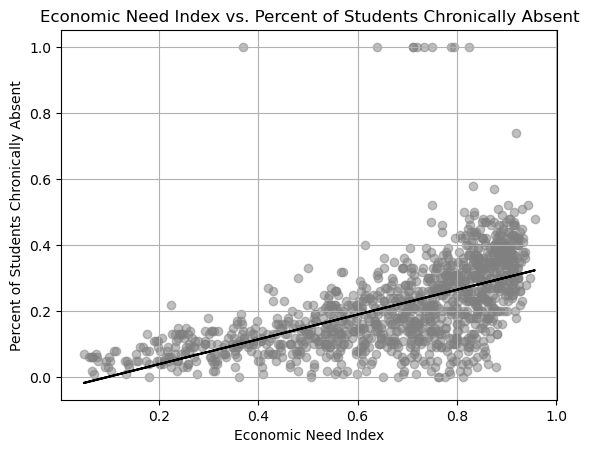

In [82]:
useful_variables = ['Economic Need Index', 'Percent of Students Chronically Absent']

#define variables
economic_need_index_values = df[useful_variables[0]]
absent_percentage_values = df[useful_variables[1]]

#create line of best fit
coefficients = np.polyfit(economic_need_index_values, absent_percentage_values, 1)
line_of_best_fit = np.polyval(coefficients, economic_need_index_values)
plt.plot(economic_need_index_values, line_of_best_fit, color='black', label='Line of Best Fit')

# create scatter plot
plt.scatter(economic_need_index_values, absent_percentage_values, color='gray', alpha=0.5)
plt.title('Economic Need Index vs. Percent of Students Chronically Absent')
plt.xlabel('Economic Need Index')
plt.ylabel('Percent of Students Chronically Absent')
plt.grid(True)
plt.show()


This scatterplot shows the relationship between the average economic need index and percent of students chronically absent from schools in New York City. It shows a positive relationship between the two, meaning schools with students that require higher amounts of economic need experience higher rates of chronic absenteeism. This could possibly be due to the fact that parents of these children are forced to work, leaving them responsible to take care of younger siblings.

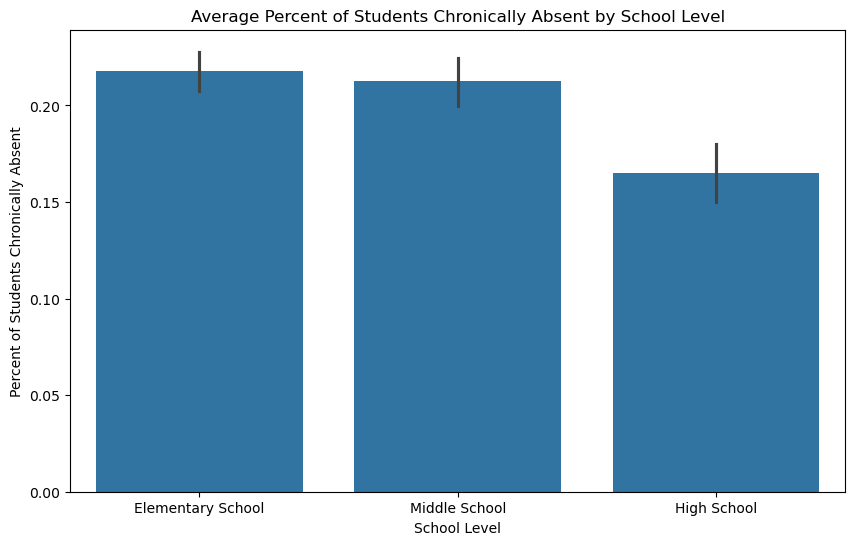

In [38]:
#create bar graph for chronic absenteeism for schools 5-8 and schools K-5

pertinent_variables = df['Grades']

def map_school_level(grades):
    if any(grade in grades for grade in ['PK', '0K', '01', '02']):
        return 'Elementary School'
    elif any(grade in grades for grade in ['06', '07', '08']):
        return 'Middle School'
    elif any(grade in grades for grade in ['09', '10', '11', '12']):
        return 'High School'
    else:
        return 'Unknown'

# Apply the mapping function to create a new column
df['School_Level'] = df['Grades'].apply(map_school_level)

# Filter unknown category
df = df[df['School_Level'] != 'Unknown']

# Order the school levels
school_order = ['Elementary School', 'Middle School', 'High School']

# Create a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='School_Level', y='Percent of Students Chronically Absent', data=df,
            order=school_order)
plt.title('Average Percent of Students Chronically Absent by School Level')
plt.xlabel('School Level')
plt.ylabel('Percent of Students Chronically Absent')
plt.show()

This bar graph shows the percent of students chronically absent by different levels of school. It displays how younger students who are in elementary and middle school tend to have higher rates of chronic absenteeism. This would go against the theory that older children stay home more often to take care of younger siblings. Instead, it could be exhibiting the fact that high school age children can safely find transportation to school by themselves, but younger children rely on their parents schedules to be driven or walked to school. It should be noted that this graph does not include any schools that are not grade level pre-K to 2, 3-5, 6-8, and 9-12. The reasoning for not including schools that do not fit this mold is that it was not possible to school level data for individual grade levels in schools. This could also be affecting the results.

### Future Steps

The relationships found in this project offer numerous steps forward for further analysis. First, regression analysis should be used on the correlation between economic need index and student absentee percentage. This will be greatly informative as there seems to be some positive relationship based on the low income summary statistics as it relates to student absenteeism and the scatterplot that examined the same. Additionally, more data for how many children are sent to public versus private schools could help shed light on trends seen in chronic absenteeism in various boroughs' schools. Further, causal analysis could help with understanding if low exam scores are caused by chronic absenteeism, or chronic absenteeism caused by students who have low test scores giving up. Lastly, data on the average age of the primary caregiver of a household would be helpful in determining if it is a factor in chronic absenteeism. 

# Project 2

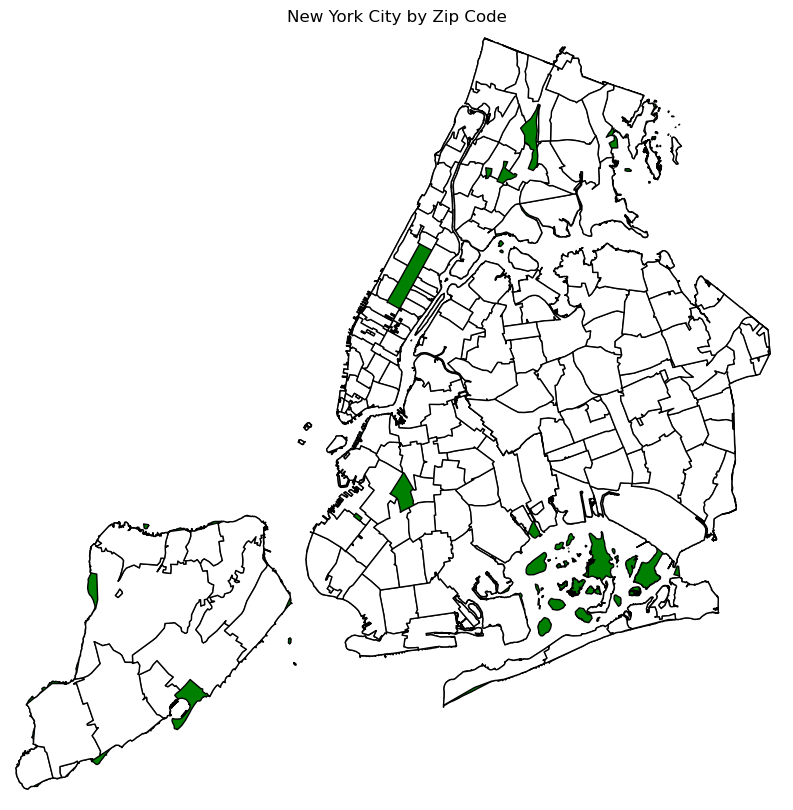

In [81]:
# Read in NYC Borough shape files
nyc_boroughs_url = "https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile"
nyc_boroughs = gpd.read_file(nyc_boroughs_url)

# Change name of borough namne column for ease
nyc_boroughs = nyc_boroughs.rename(columns={'boro_name': 'BoroName'})

# Plot New York City Map
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
nyc_boroughs.plot(ax=ax, edgecolor="black", facecolor='green') #facecolor green because its the areas that have no addresses/zip codes - parks

# Read in Zip Codes
zip_df = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_zcta510_500k.zip")

#make sure we're overlaying on same CRS
zip_df = zip_df.to_crs(nyc_boroughs.crs)

# Filter to include only NYC zip codes
nyc_zip_codes = gpd.overlay(zip_df, nyc_boroughs, how='intersection')

# Plot ZIP Codes
nyc_zip_codes.plot(ax=ax, edgecolor='black', facecolor = 'white')

# Set the coordinates to show NYC 
ax.set_xlim([-74.26, -73.69])  #Longitude
ax.set_ylim([40.49, 40.92])    #Latitude

#remove Axes
plt.axis("off")

#Adjust plot labels
plt.title("New York City by Zip Code")
plt.show()

#choose data to incorporate into map - make sure green areas are all actually parks or maybe just put them as black because they have no zip code

### Conclusion

Chronic absenteeism can have numerous negative effects on students including social and academic challenges. Understanding the factors that contribute to chronic absenteeism is therefore crucial in helping students overcome these obstacles. The data has shown that higher rates of chronic absenteeism is linked to numerous factors such as economic need, school district, and school level. The strongest relationship explored so far is how in schools that serve students with higher economic need there is greater amounts of chronic absenteeism. Other covariates that show relationships with chronic absenteeism include the borough in which the school district is located and grade level of students.

Students who are chronically absent can have many reasons to not have gone to school including illness, family emergency, and bullying issues. To further understand the causes of chronic absenteeism, the data must be further categorized into reasons why a student is absent. With such data, greater analysis can be done on both immediate and structural causes for chronic absenteeism.

In [74]:
nyc_boroughs.head()

,boro_code,BoroName,shape_area,shape_leng,geometry
0,5.0,Staten Island,1.623621e+09,325917.353950,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,1.0,Manhattan,6.365205e+08,357713.308162,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
2,2.0,Bronx,1.187175e+09,463180.579449,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
3,3.0,Brooklyn,1.934138e+09,728146.574928,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
4,4.0,Queens,3.041419e+09,888199.731385,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


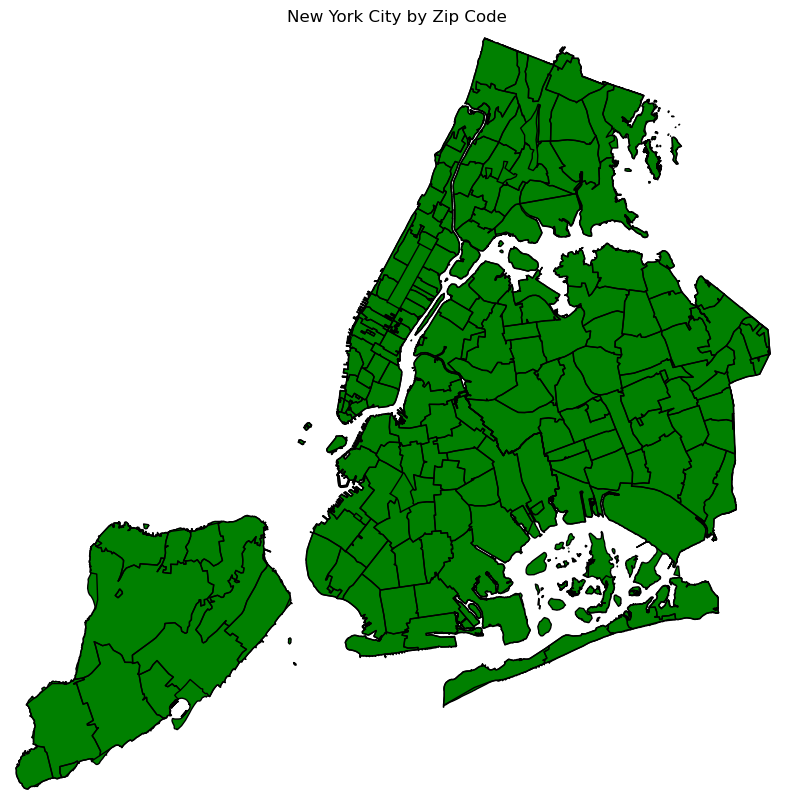

In [78]:

#THIS MAP SHOWS ALL ON SAME MAP, ZIP CODES AREN'T ON SEPERATE MAP, KIND OF NOT REALLY WHAT I NEED RIGHT NOW DUE TO PROBLEMS WITH NON-ZIP CODE AREAS BUT IF I WANT TO INVESTIGATE BY BOROUGH THEN I'LL NEED TO USE THIS ONE

# Read in NYC Borough shape files
nyc_boroughs_url = "https://data.cityofnewyork.us/api/geospatial/tqmj-j8zm?method=export&format=Shapefile"
nyc_boroughs = gpd.read_file(nyc_boroughs_url)

# Change name of borough name column for ease
nyc_boroughs = nyc_boroughs.rename(columns={'boro_name': 'BoroName'})

# Read in Zip Codes
zip_df = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_zcta510_500k.zip")

# Ensure zip codes are only in NYC 
zip_df = zip_df.to_crs(nyc_boroughs.crs)

# Filter to include only NYC zip codes
nyc_zip_codes = gpd.overlay(zip_df, nyc_boroughs, how='intersection')

# Plot New York City Map
fig, ax = plt.subplots(figsize=(10, 10), facecolor='white')
nyc_boroughs.plot(ax=ax, edgecolor="black", facecolor='green')

# Plot ZIP Codes on the same ax
nyc_zip_codes.plot(ax=ax, edgecolor='black', facecolor='none')

# Set the limits to zoom in on a specific area
ax.set_xlim([-74.26, -73.69])  # Longitude range
ax.set_ylim([40.49, 40.92])    # Latitude range

# Remove Axes
ax.axis("off")

# Plot final map
plt.title("New York City by Zip Code")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()
